# Scop
Analiza si detecteare atackului de flood cu pachete icmp.

## Analiza datelor

In [133]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
csv_file = 'h1-attack-exp-v2.csv'
df = pd.read_csv(csv_file)
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.0.0.2,10.0.0.1,TCP,2962,"39088 > 5001 [PSH, ACK] Seq=1 Ack=1 Win=83 L..."
1,2,0.001803,10.0.0.2,10.0.0.1,TCP,2962,[TCP Previous segment not captured] 39088 > ...
2,3,0.004655,10.0.0.2,10.0.0.1,TCP,2962,"39088 > 5001 [PSH, ACK] Seq=11585 Ack=1 Win=..."
3,4,0.005877,10.0.0.1,10.0.0.2,TCP,86,5001 > 39088 [ACK] Seq=1 Ack=4294958609 Win=...
4,5,0.006852,10.0.0.1,10.0.0.2,TCP,94,[TCP Dup ACK 4#1] 5001 > 39088 [ACK] Seq=1 A...


### Per timp, evolutia tipurilor numarului de pachete 

In [135]:
grouped = df.groupby(['Time', 'Protocol'])['Protocol'].count().to_frame()
grouped

,,Protocol
Time,Protocol,
0.000000,TCP,1
0.001803,TCP,1
0.004655,TCP,1
0.005877,TCP,1
0.006852,TCP,1
...,...,...
61.210977,ICMP,2
61.210978,ICMP,2
61.210979,ICMP,3


In [136]:

bins_number = 100
bins = np.linspace(df.Time.min(), df.Time.max(), bins_number)
bins

array([ 0.        ,  0.61829274,  1.23658547,  1.85487821,  2.47317095,
        3.09146369,  3.70975642,  4.32804916,  4.9463419 ,  5.56463464,
        6.18292737,  6.80122011,  7.41951285,  8.03780559,  8.65609832,
        9.27439106,  9.8926838 , 10.51097654, 11.12926927, 11.74756201,
       12.36585475, 12.98414748, 13.60244022, 14.22073296, 14.8390257 ,
       15.45731843, 16.07561117, 16.69390391, 17.31219665, 17.93048938,
       18.54878212, 19.16707486, 19.7853676 , 20.40366033, 21.02195307,
       21.64024581, 22.25853855, 22.87683128, 23.49512402, 24.11341676,
       24.73170949, 25.35000223, 25.96829497, 26.58658771, 27.20488044,
       27.82317318, 28.44146592, 29.05975866, 29.67805139, 30.29634413,
       30.91463687, 31.53292961, 32.15122234, 32.76951508, 33.38780782,
       34.00610056, 34.62439329, 35.24268603, 35.86097877, 36.47927151,
       37.09756424, 37.71585698, 38.33414972, 38.95244245, 39.57073519,
       40.18902793, 40.80732067, 41.4256134 , 42.04390614, 42.66

In [137]:
grouped = df.groupby([pd.cut(df.Time, bins), 'Protocol'])['Protocol'].count().unstack(level='Protocol')
grouped.columns.name = 'Time'
grouped = grouped.replace(np.NaN, 0)
grouped

C:\Users\andre\AppData\Local\Temp\ipykernel_19852\1976861675.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Time,ICMP,TCP
Time,,
"(0.0, 0.618]",0,82
"(0.618, 1.237]",0,1
"(1.237, 1.855]",0,0
"(1.855, 2.473]",0,1
"(2.473, 3.091]",0,0
...,...,...
"(58.12, 58.738]",0,0
"(58.738, 59.356]",0,0
"(59.356, 59.974]",0,0


<Axes: xlabel='Time'>

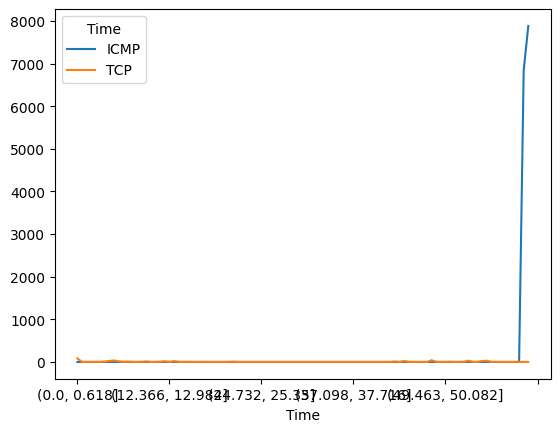

In [138]:
grouped.plot()

In [139]:
grouped = df[['Time', 'Protocol']]['Protocol'].groupby([pd.cut(df.Time, bins)]).count()
# grouped.unstack()
# grouped.columns
grouped

C:\Users\andre\AppData\Local\Temp\ipykernel_19852\3768819096.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Time
(0.0, 0.618]          82
(0.618, 1.237]         1
(1.237, 1.855]         0
(1.855, 2.473]         1
(2.473, 3.091]         0
                    ... 
(58.12, 58.738]        0
(58.738, 59.356]       0
(59.356, 59.974]       0
(59.974, 60.593]    6847
(60.593, 61.211]    7885
Name: Protocol, Length: 99, dtype: int64

In [140]:
fig = px.line(grouped, x="Time", y='Count', color='Protocol')
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Protocol'] but received: Time